# Image sample

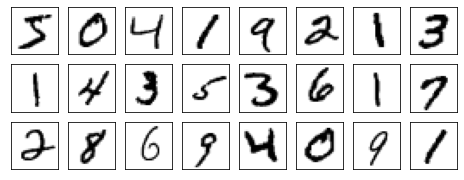

(60000, 28, 28, 1)

In [2]:
from data_loader import *
from utils import display_sample_img
x_train, _, _, _ = mnist_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape
# 이미지 -1~1 제너레이터가 -1~1까지의 이미지를 생성해야한다.

# GAN
* BuildModel(img_shape, Z_dimention, label_dimention)

## Generator, Discriminator

In [3]:
from model import BuildModel
IMG_SHAPE = (28,28,1)
Z_DIM = 128
builder = BuildModel(IMG_SHAPE, Z_DIM)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
print()
disc.summary()

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noise (InputLayer)          [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 6272)              809088    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 128)        512       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       204864    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       25

## GAN Fit

In [4]:
# genertor
# discriminator

# input = 노이즈
# gan 안에 두개를 합치기
# output = logit (0/1)

# discriminator 1차 학습 ( trainable = True )
# genertor 학습 ( dis _ trainable = False )

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 Generator (Functional)      (None, 28, 28, 1)         1016321   
                                                                 
 Discriminator (Functional)  (None, 1)                 214913    
                                                                 
Total params: 1,231,234
Trainable params: 1,015,937
Non-trainable params: 215,297
_________________________________________________________________
* epoch: 1, d_loss: 902.443009, g_loss: 2934.889355
1/1 [==============================] - 0s 59ms/step


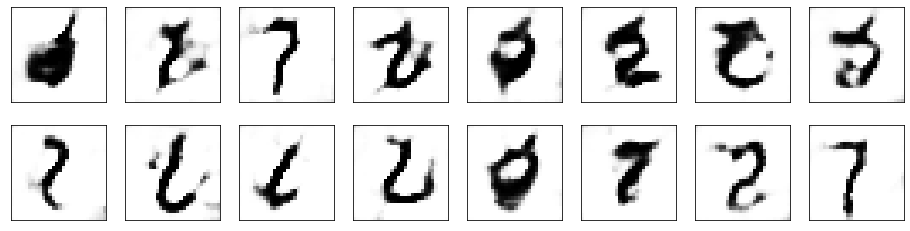

* epoch: 2, d_loss: 1036.237756, g_loss: 2262.704520
1/1 [==============================] - 0s 11ms/step


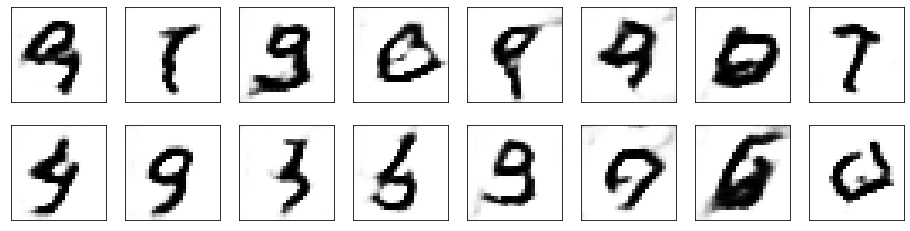

* epoch: 3, d_loss: 990.702368, g_loss: 2340.251385
1/1 [==============================] - 0s 11ms/step


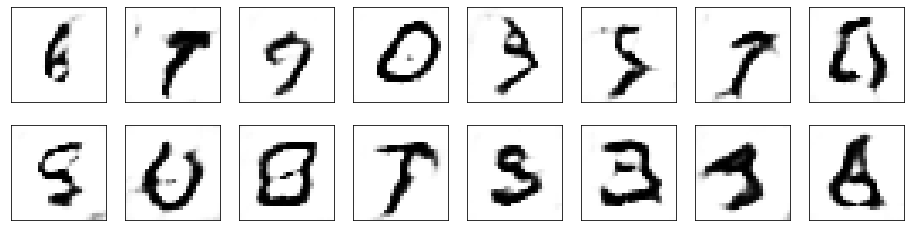

* epoch: 4, d_loss: 911.407149, g_loss: 2673.214747
1/1 [==============================] - 0s 11ms/step


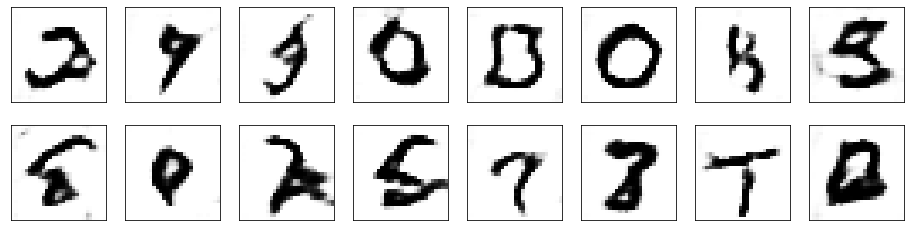

* epoch: 5, d_loss: 860.529041, g_loss: 2895.671343
1/1 [==============================] - 0s 12ms/step


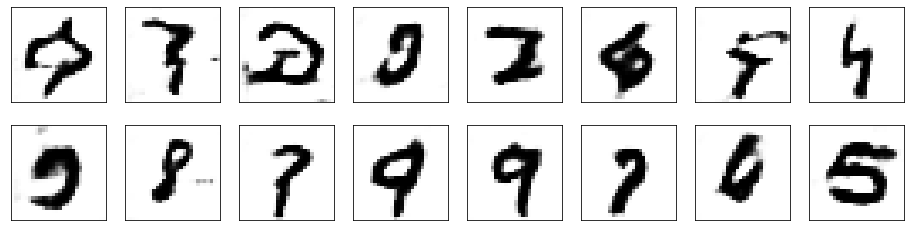

In [5]:
from gan import GAN
model = GAN(gene, disc, IMG_SHAPE, Z_DIM)
model.Compile()
model.gan.summary()
model.fit(x_train,  epochs= 5, standard=True)

# CGAN

* BuildModel(img_shape, Z_dimention, label_dimention)

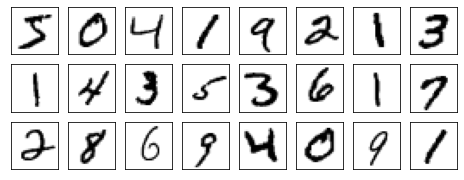

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28), (10000, 10))

In [6]:
from data_loader import *
from utils import display_sample_img

IMG_SHAPE = (28,28,1)
NOISE_DIM = 128
LABEL_DIM = 10

x_train, y_train, x_test, y_test = mnist_loader(True, True)
display_sample_img(x_train, (3,8), True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# x_train, _, _, _ = mnist_loader(True, True)
# display_sample_img(x_train, (3,8), True)
# x_train.shape

In [7]:
from model import BuildModel
builder = BuildModel(IMG_SHAPE, NOISE_DIM, label_dim=10)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
disc.summary()

Model: "C_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 noise (InputLayer)             [(None, 128)]        0           []                               
                                                                                                  
 condition (InputLayer)         [(None, 10)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 138)          0           ['noise[0][0]',                  
                                                                  'condition[0][0]']              
                                                                                                  
 dense_3 (Dense)                (None, 6272)         871808      ['concatenate[0][0]']  

Model: "GAN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 C_Generator (Functional)       (None, 28, 28, 1)    1079041     ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 C_Discriminator (Functional)   (None, 1)            246913      ['C_Generator[0][0]',          

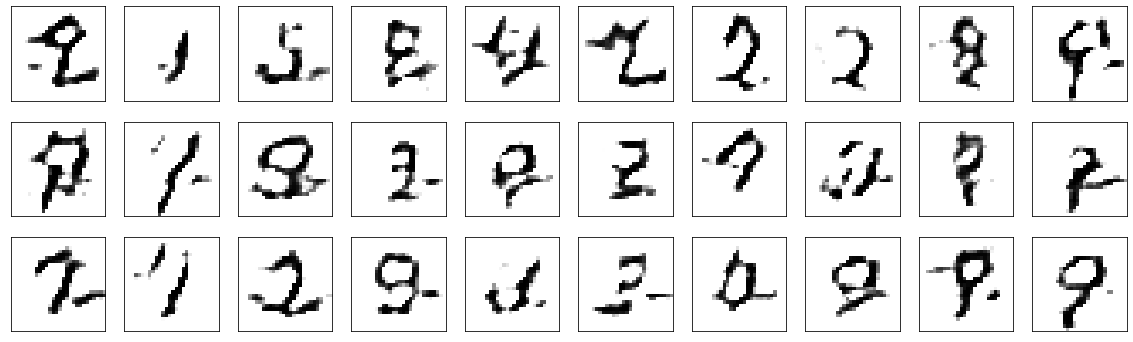

* epoch: 2, d_loss: 980.176872, g_loss: 2691.944898
1/1 [==============================] - 0s 14ms/step


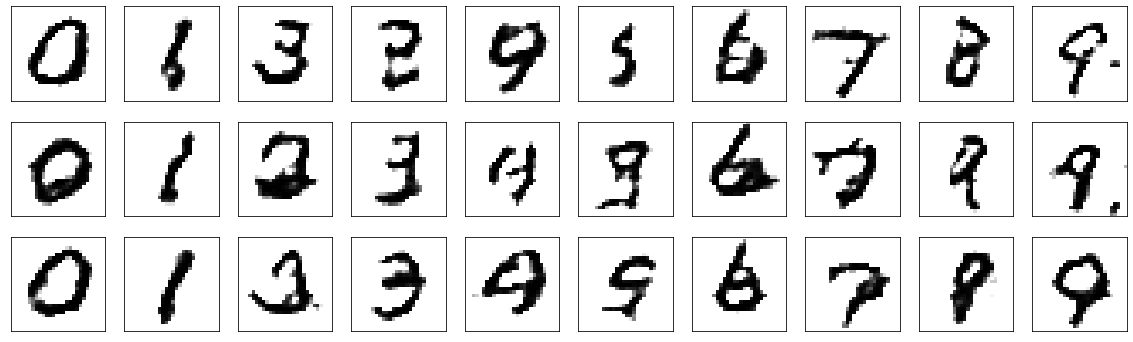

* epoch: 3, d_loss: 1030.746124, g_loss: 2446.944370
1/1 [==============================] - 0s 13ms/step


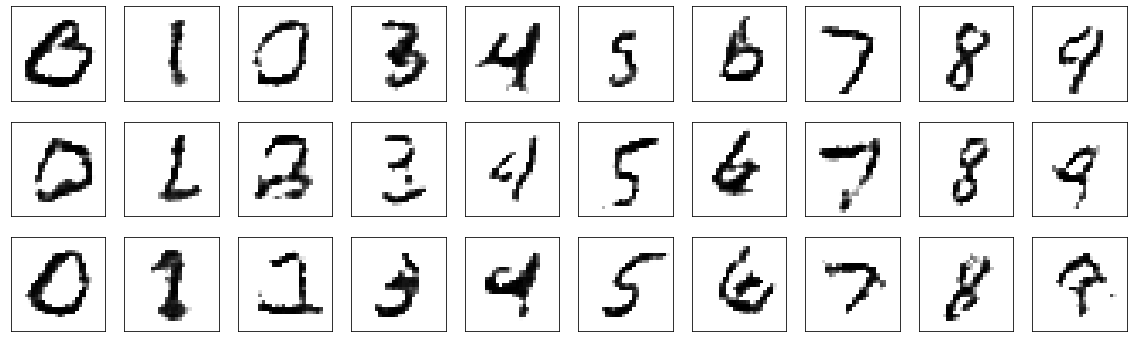

* epoch: 4, d_loss: 1029.793256, g_loss: 2359.582866
1/1 [==============================] - 0s 12ms/step


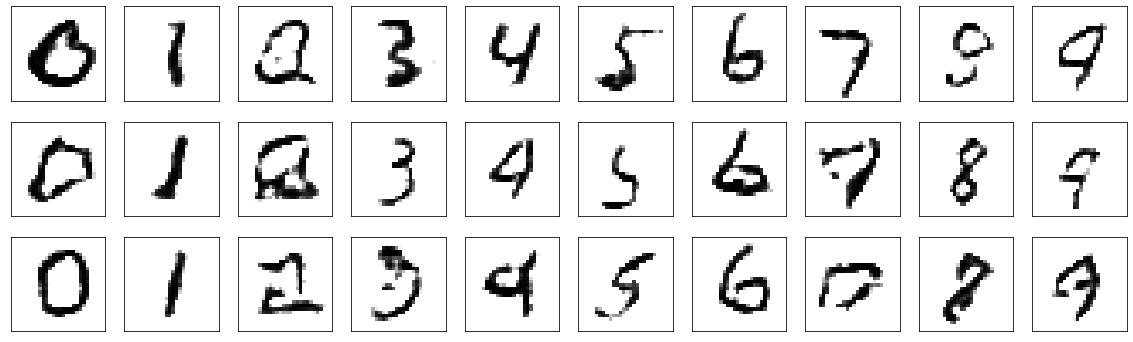

* epoch: 5, d_loss: 1056.899013, g_loss: 2213.583562
1/1 [==============================] - 0s 13ms/step


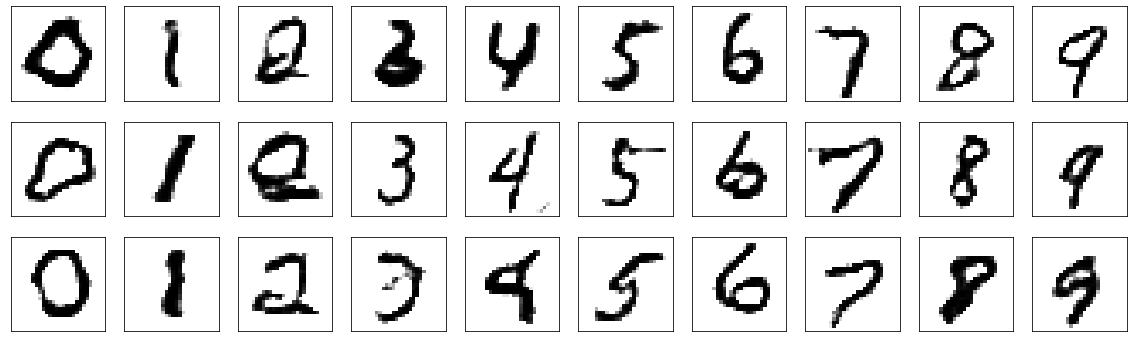

In [8]:
from gan import GAN
model = GAN(gene, disc, IMG_SHAPE, NOISE_DIM,LABEL_DIM)
model.Compile()
model.gan.summary()
model.fit(x_train,y_train,  epochs= 5)